# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요.

In [49]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
# 한글 세팅

# MS
# plt.rc("font", family = "Malgun Gothic")
# sns.set(font="Malgun Gothic",
# rc={"axes.unicode_minus":False}, style='white')

# Mac
plt.rc("font", family="Apple SD Gothic Neo")
sns.set(font="Apple SD Gothic Neo", 
        rc={"axes.unicode_minus": False}, style='white')

In [111]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')

---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [5]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [6]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.
data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [7]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape

(12000, 21)

In [8]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [9]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CID,12000.0,6.000500e+03,3.464246e+03,1.00000,3000.7500,6.000500e+03,9.000250e+03,1.200000e+04
AGE,12000.0,3.079000e+00,1.121768e+00,1.00000,3.0000,3.000000e+00,4.000000e+00,6.000000e+00
성별,12000.0,4.875833e-01,4.998666e-01,0.00000,0.0000,0.000000e+00,1.000000e+00,1.000000e+00
Willingness to pay/Stay,12000.0,8.859478e+00,7.698885e+00,2.04573,4.3734,6.384831e+00,9.867900e+00,9.249630e+01
갱신,12000.0,1.430000e-01,3.500874e-01,0.00000,0.0000,0.000000e+00,0.000000e+00,1.000000e+00
소득,12000.0,4.641737e+07,3.736221e+07,0.00000,0.0000,4.186240e+07,7.664150e+07,1.320209e+08
월 납입액,12000.0,1.000658e+02,4.245375e+01,60.00000,70.0000,9.000000e+01,1.200000e+02,3.500000e+02
VOC,12000.0,3.901667e-01,9.196052e-01,0.00000,0.0000,0.000000e+00,0.000000e+00,5.000000e+00
총지불금액,12000.0,5.355854e+05,3.587993e+05,0.00000,336000.0000,4.740000e+05,6.790000e+05,3.573000e+06


In [12]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [48]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [13]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

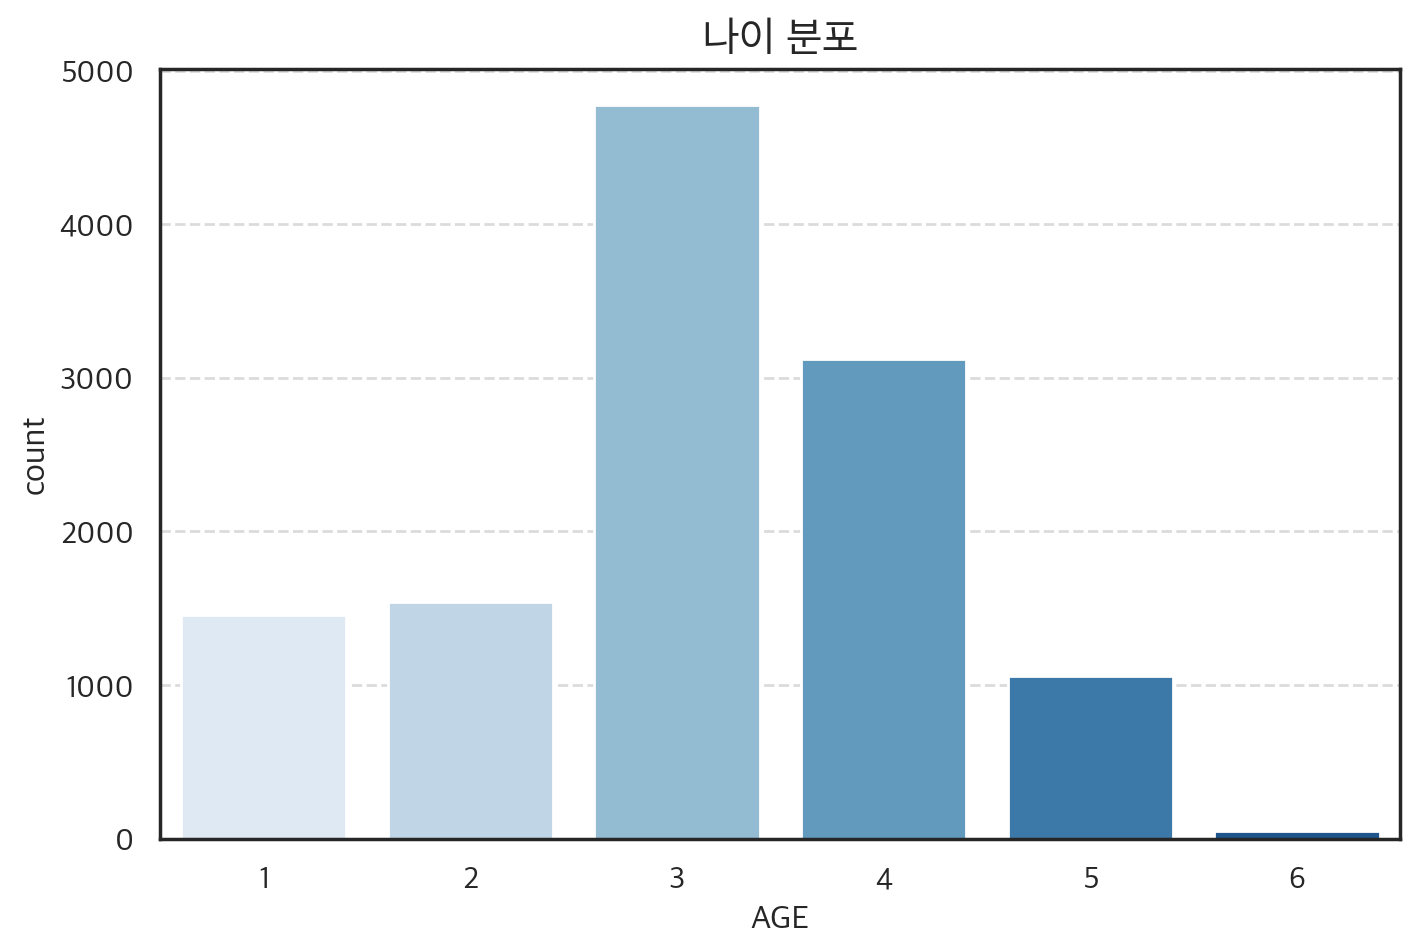

In [63]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

plt.figure(figsize=(8, 5))
sns.countplot(x='AGE', data=data, palette='Blues')
plt.title('나이 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2) 고용상태

In [56]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.
data['고용상태'].value_counts().sort_index()

고용상태
FALSE     360
고용       7518
무직       3028
휴직       1094
Name: count, dtype: int64

In [55]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data['고용상태'].value_counts(normalize = True).sort_index()

고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64

In [ ]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

# 4대보험에 가입할 수 없는 일용직 등이라면? => 고용, 무직, 휴직도 아닌 애매한 상태라서 미응답하여 FALSE로 선택되었을 수도

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [ ]:
# 고용이 전체의 62% 정도를 차지하였고 무직(25%), 휴직(9%)이 뒤를 이었음
# 고용상태에 따라 어떤 타입의 상품을 선택하고 있는지, 월 납입액은 얼마인지 등을 같이 확인하면 좋을 듯

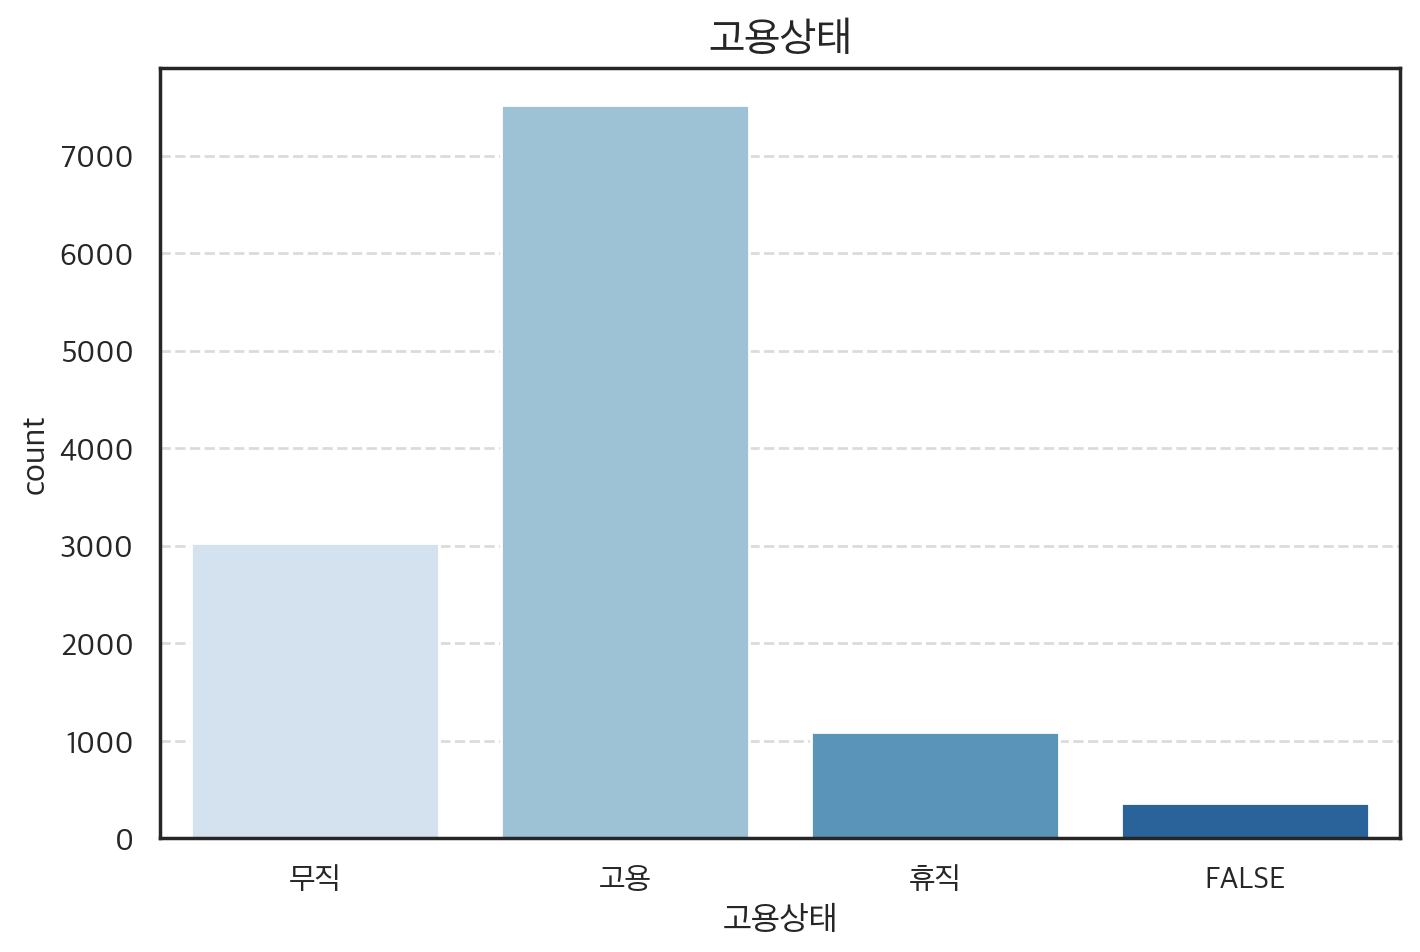

In [59]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!
plt.figure(figsize=(8, 5))
sns.countplot(x='고용상태', data=data, palette='Blues')
plt.title('고용상태 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3) 교육수준

In [57]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.
data['교육수준'].value_counts().sort_index()

교육수준
고졸이하    3477
대학졸업    7105
박사       439
석사       979
Name: count, dtype: int64

In [58]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.
data['교육수준'].value_counts(normalize = True).sort_index()

교육수준
고졸이하    0.289750
대학졸업    0.592083
박사      0.036583
석사      0.081583
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 대학 졸업이 약 59%로 가장 높았고, 그 뒤로 고졸이하가 28%, 석사가 8%, 박사가 3%를 차지하고 있음
# 국내 학력수준 평균을 보았을 때 대졸이 가장 많고, 그다음이 고졸 - 석사 - 박사로 나올수도? => 당연한 결과

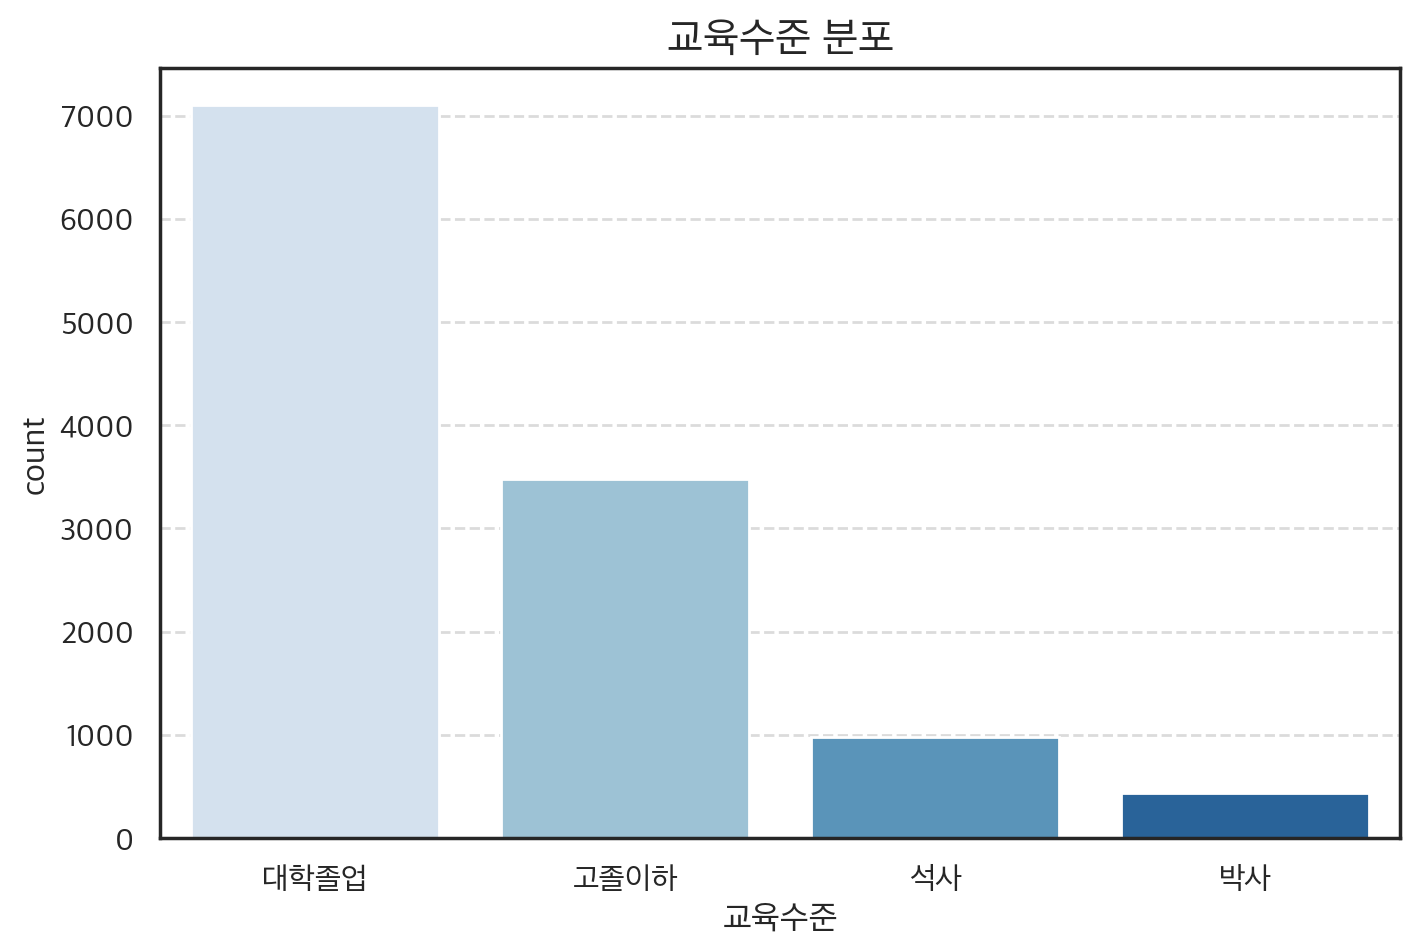

In [64]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!
plt.figure(figsize=(8, 5))
sns.countplot(x='교육수준', data=data, palette='Blues')
plt.title('교육수준 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4) 상품타입

In [65]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.
data['상품타입'].value_counts(normalize = True).sort_index()

상품타입
고급    0.089583
기본    0.606500
중급    0.303917
Name: proportion, dtype: float64

<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 기본이 60%, 중급이 30%, 고급이 약 8% 정도를 차지함
# 기본과 중급, 고급에 따른 혜택의 차이를 확인할 수 있으면 좋을 것 같음
# 기본에 몰려있는 이유가 가격적인 측면도 있을 수 있지만, 중급과 기본의 혜택 차이가 미미해서 기본을 가입해도 충분해서 기본에 몰려있을수도

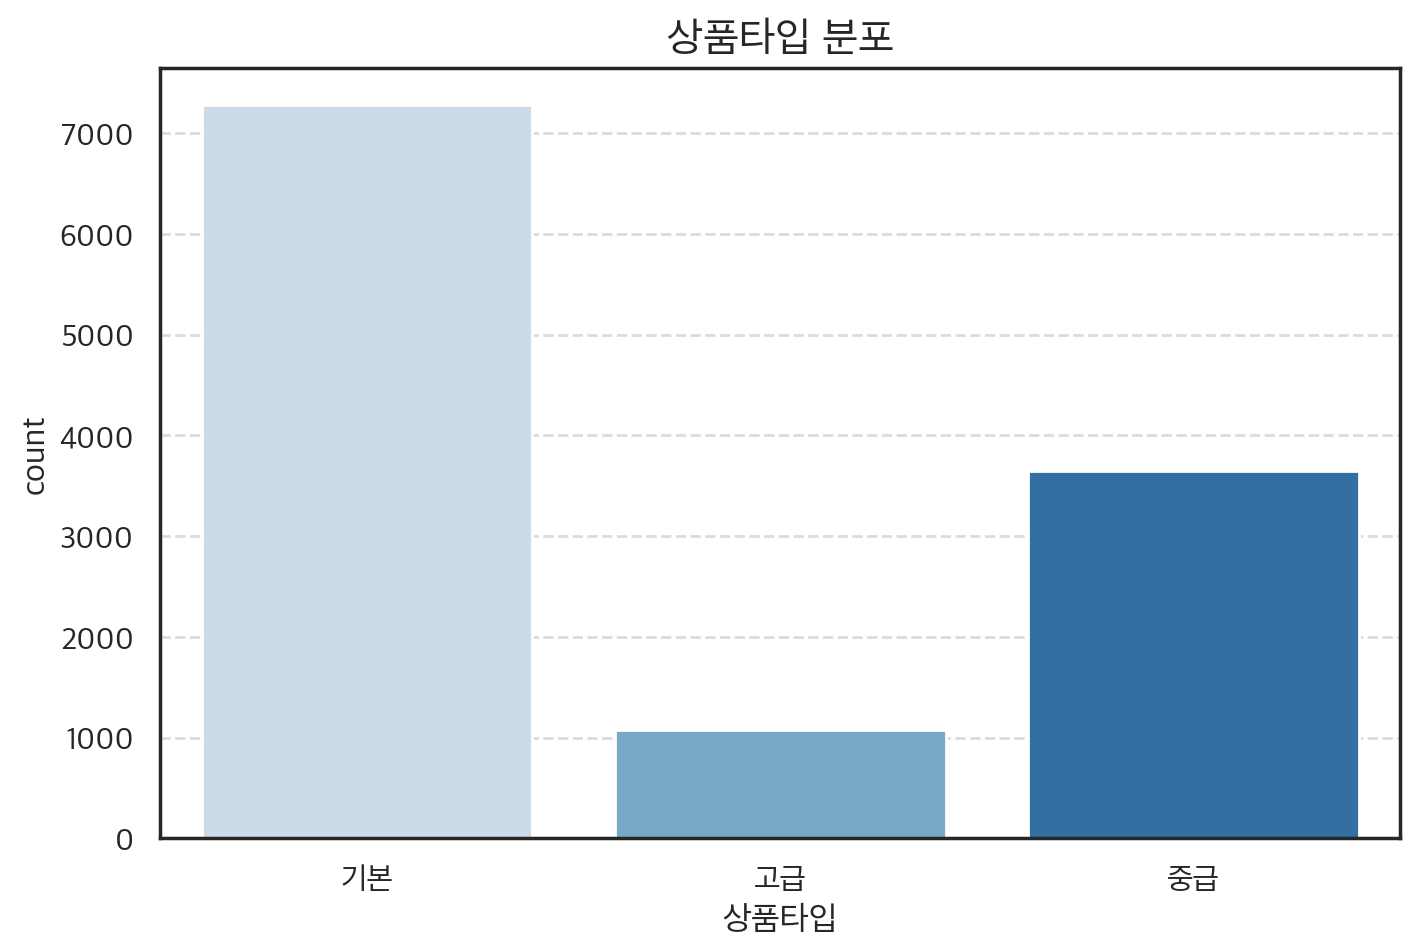

In [66]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
plt.figure(figsize=(8, 5))
sns.countplot(x='상품타입', data=data, palette='Blues')
plt.title('상품타입 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5) 거주지사이즈

In [67]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.
data['거주지사이즈'].value_counts(normalize = True).sort_index()

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64

<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 중이 70%로 가장 많았고, 소(약 20%). 대(10%) 순으로 나타남
# 거주 주택이 가격과 평형대를 종합적으로 고려했다고 하는데, 걸리는건 설계사가 입력했다는 점
# 설계사가 실수했음 우째...? 종합적 고려라는게 설계사 재량이 들어가는 부분이라면 설계사마다 다르게 평가할 수도 있지않나
# 거주지사이즈보다는 소득이 더 정확한 정보일 수 있음

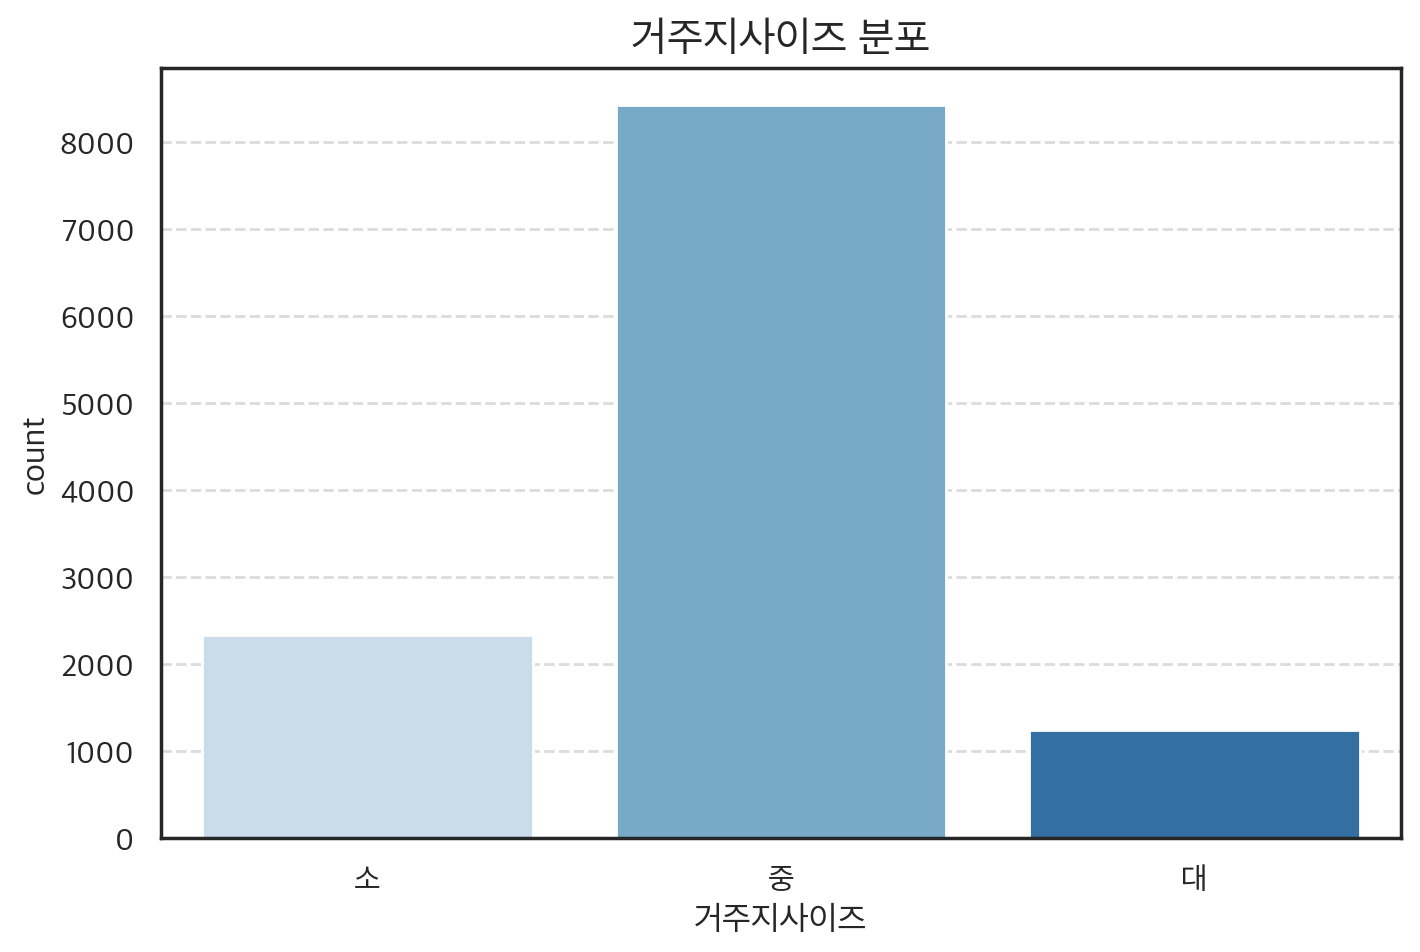

In [68]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
plt.figure(figsize=(8, 5))
sns.countplot(x='거주지사이즈', data=data, palette='Blues')
plt.title('거주지사이즈 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6) 자동차

In [69]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.
data['자동차'].value_counts(normalize = True).sort_index()

자동차
SUV     0.194667
고급차     0.037833
스포츠카    0.054333
일반세단    0.506167
컴팩트카    0.207000
Name: proportion, dtype: float64

<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 일반세단이 50%로 가장 높았고 컴팩트카(20%), SUV(19%), 스포츠카(5%), 고급차(3%) 순으로 나타남
# 자동차, 소득, 타 상품 보유 현황 등이 있으니 마케팅 방안 같은거 고민할 때 자동차 보험 같은거랑 같이 생각해봐도 될듯?

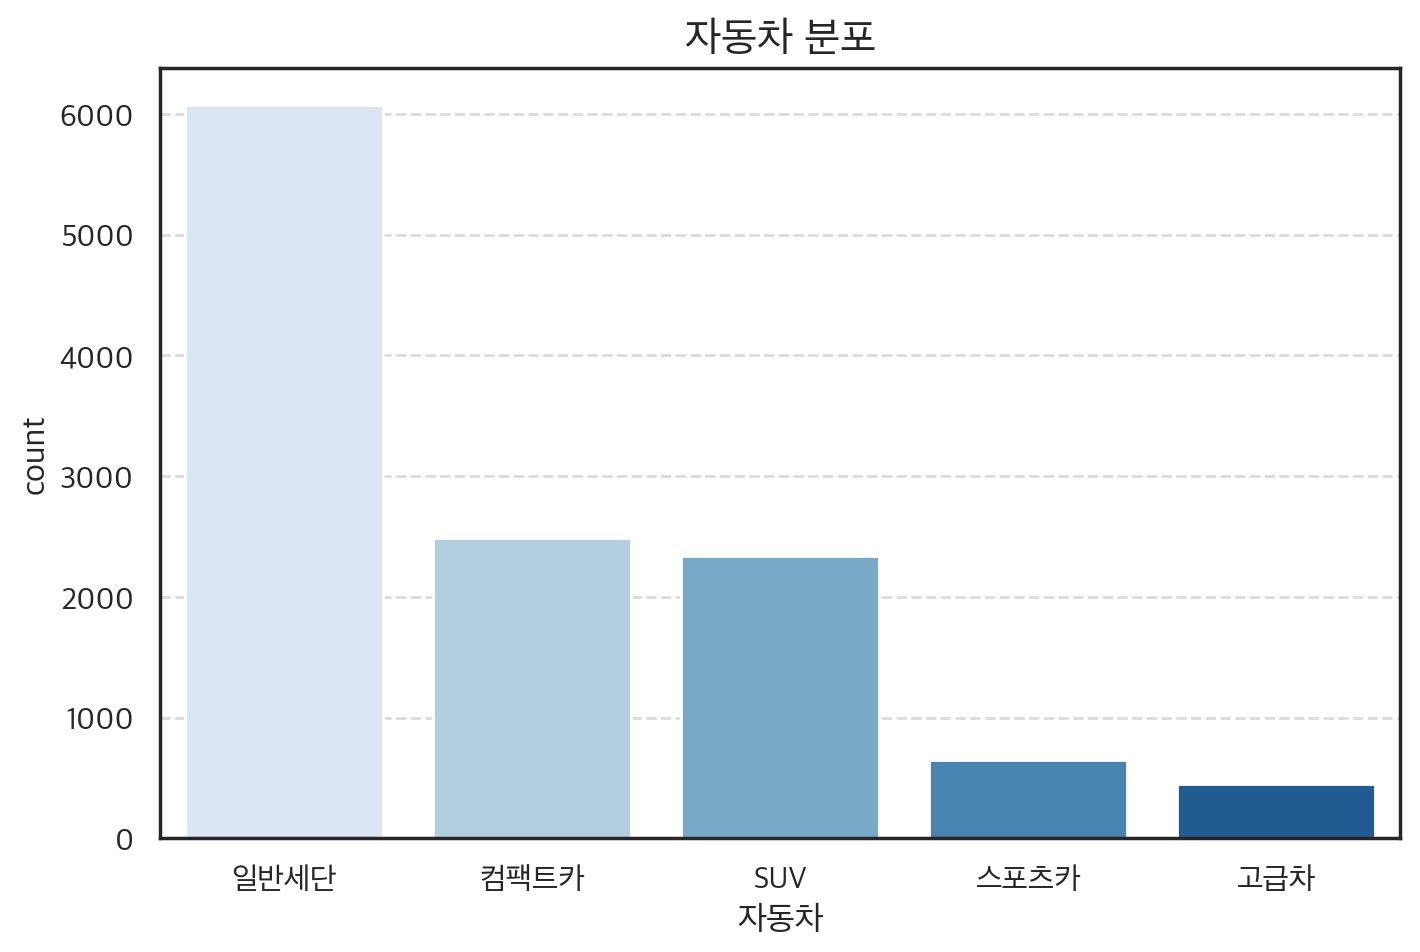

In [70]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
plt.figure(figsize=(8, 5))
sns.countplot(x='자동차', data=data, palette='Blues')
plt.title('자동차 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [71]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


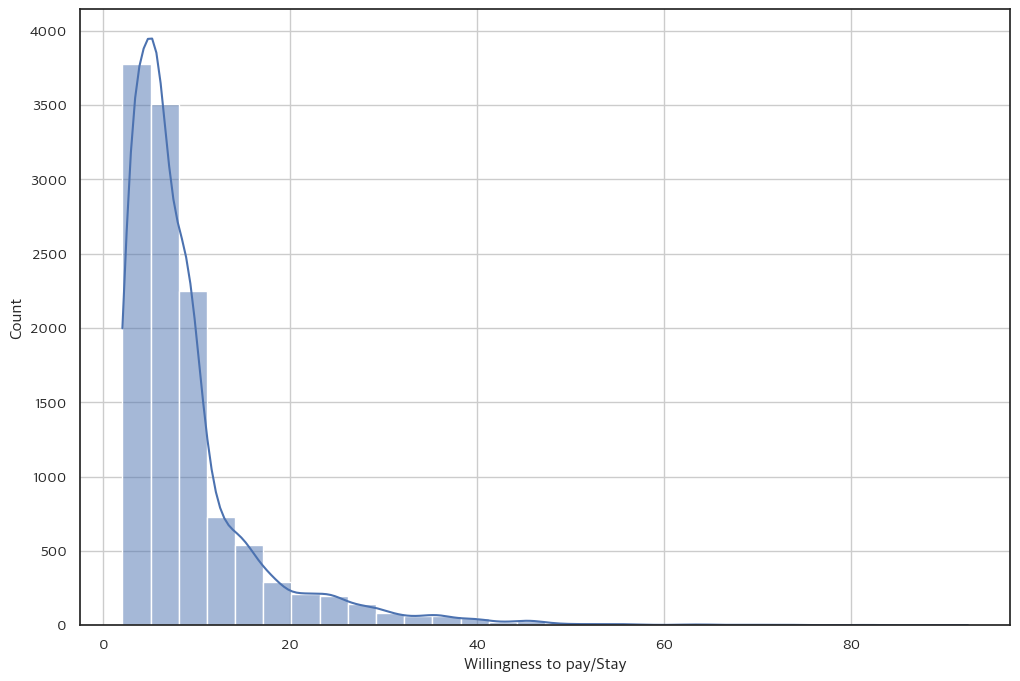

In [33]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [34]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
feature = 'Willingness to pay/Stay'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
Willingness to pay/Stay,12000.0,8.859478,7.698885,2.04573,4.3734,6.384831,9.8679,92.4963


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.
# 보험료 대비 상품별 혜택이 부족하거나, 상품에 대한 다양한 선택지가 부족할 수 있음

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

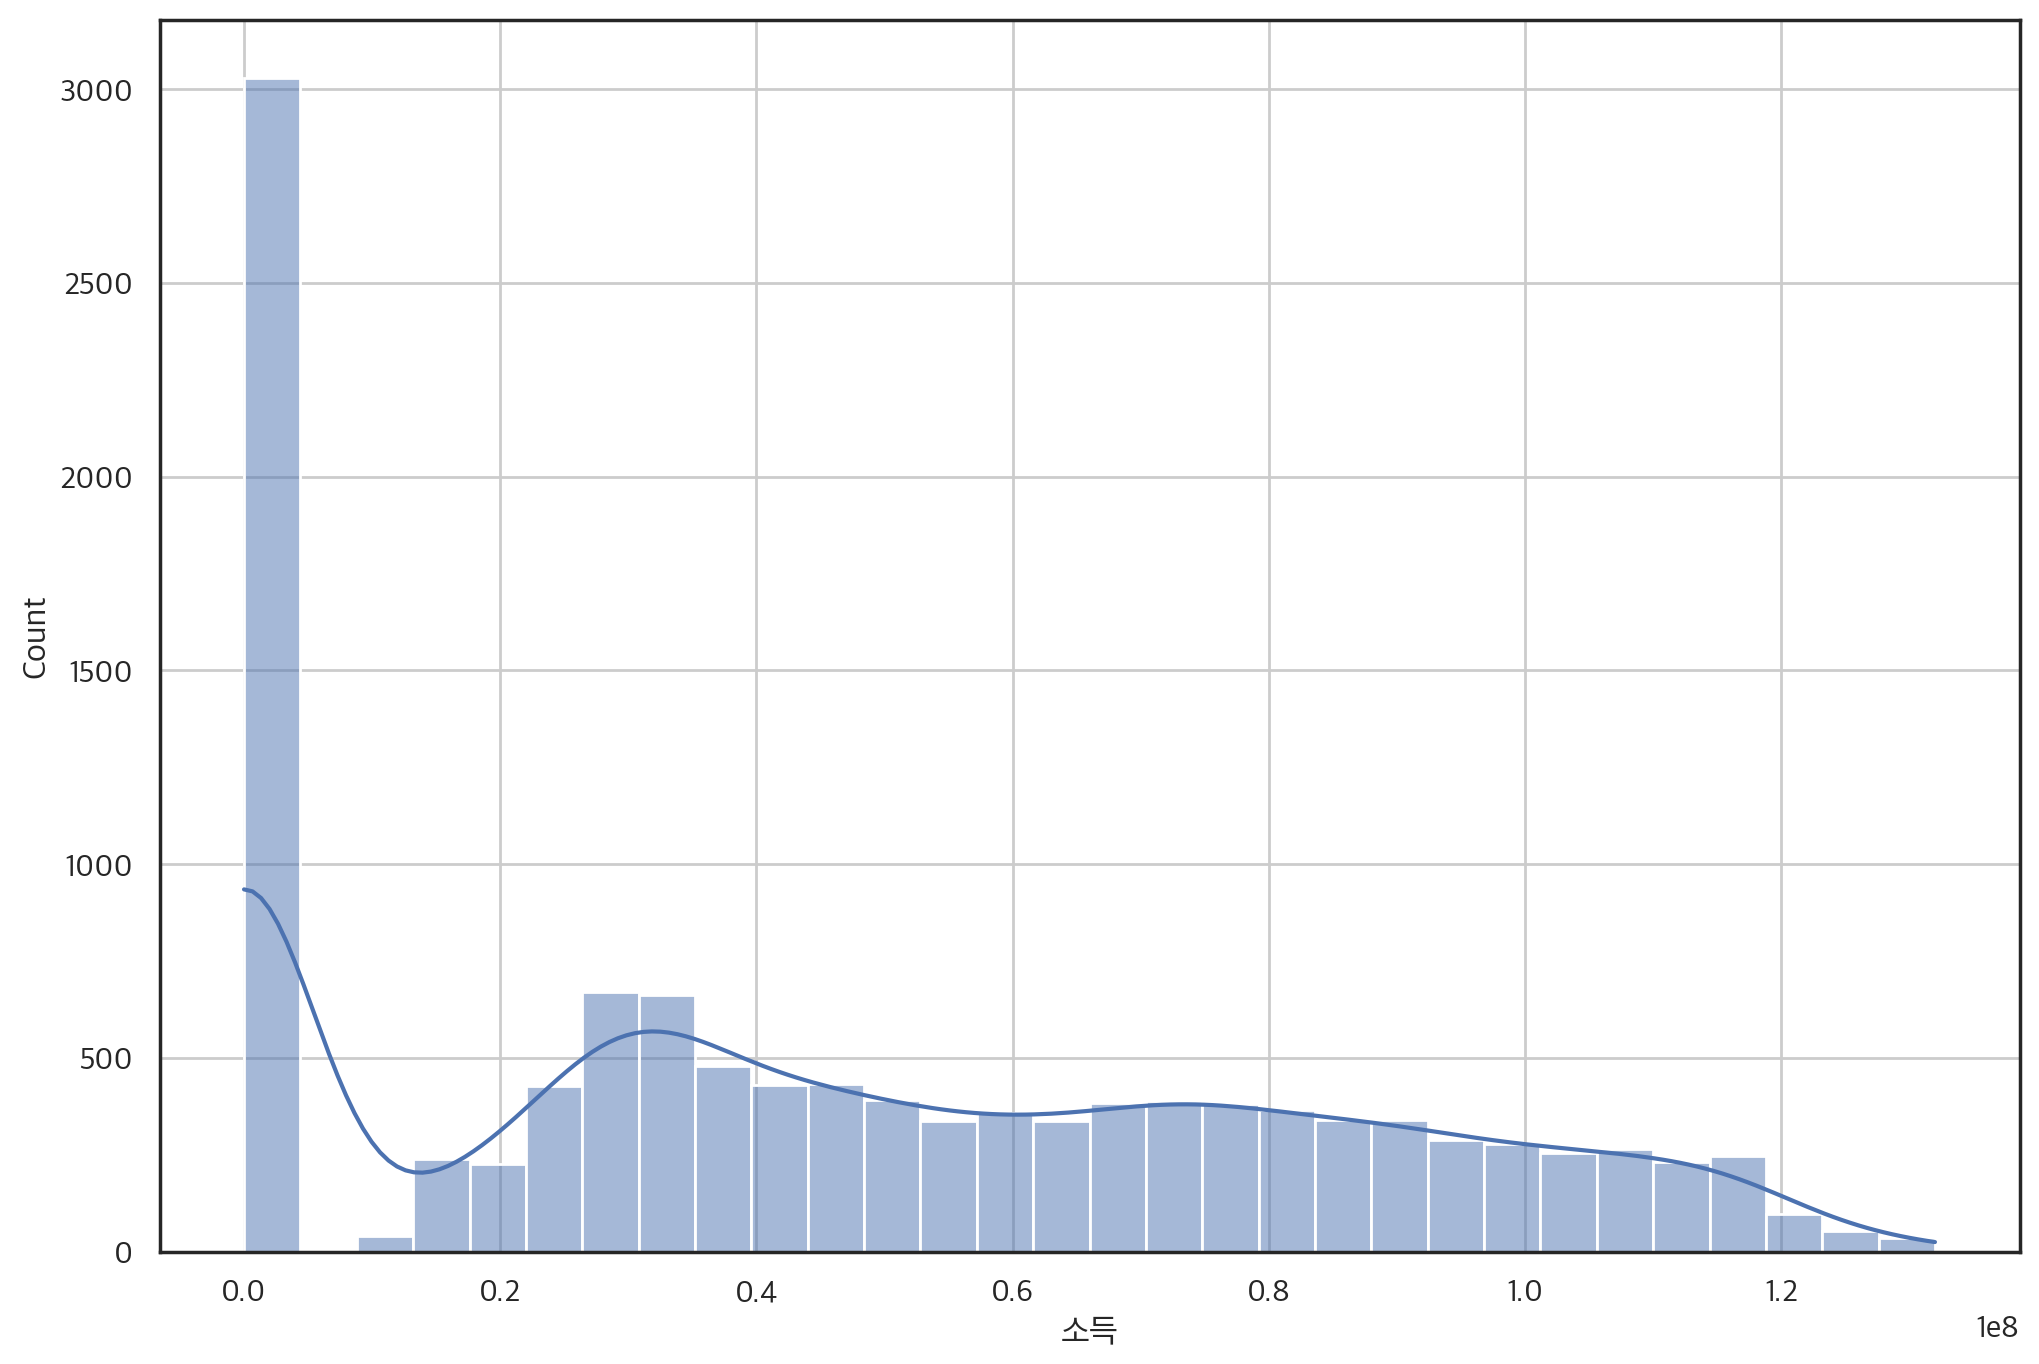

In [72]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['소득'],bins=30,kde=True)
plt.grid()
plt.show()

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [91]:
feature = '소득'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
소득,12000.0,46417371.85,3.736221e+07,0.0,0.0,41862400.0,76641500.0,132020900.0


In [ ]:
# 소득이 적은 사람들이 많음 => 그래서 기본 상품을 가입한 사람들의 비율이 많았던건가
# 아니면 사회초년생들을 위한 보험을 주로 하고 있나? => 나이 분포를 봤을 때는 4050대가 많았는데

# 기존 저소득 가입자들을 그대로 유지하면서, 2030대 사회초년생과 소득이 높은 사람들을 끌어올 필요가 있는 듯
  # 보험은 한번 들어두면 오래 가니까 2030세대들이 가입해서 소득이 높아지는 시기에도 우리 보험을 쓸 수 있도록
  # 소득이 높은 사람들 역시 한번 가입할 때 비싼 상품을 가입해서 오래갈거니까 붙잡아야함

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

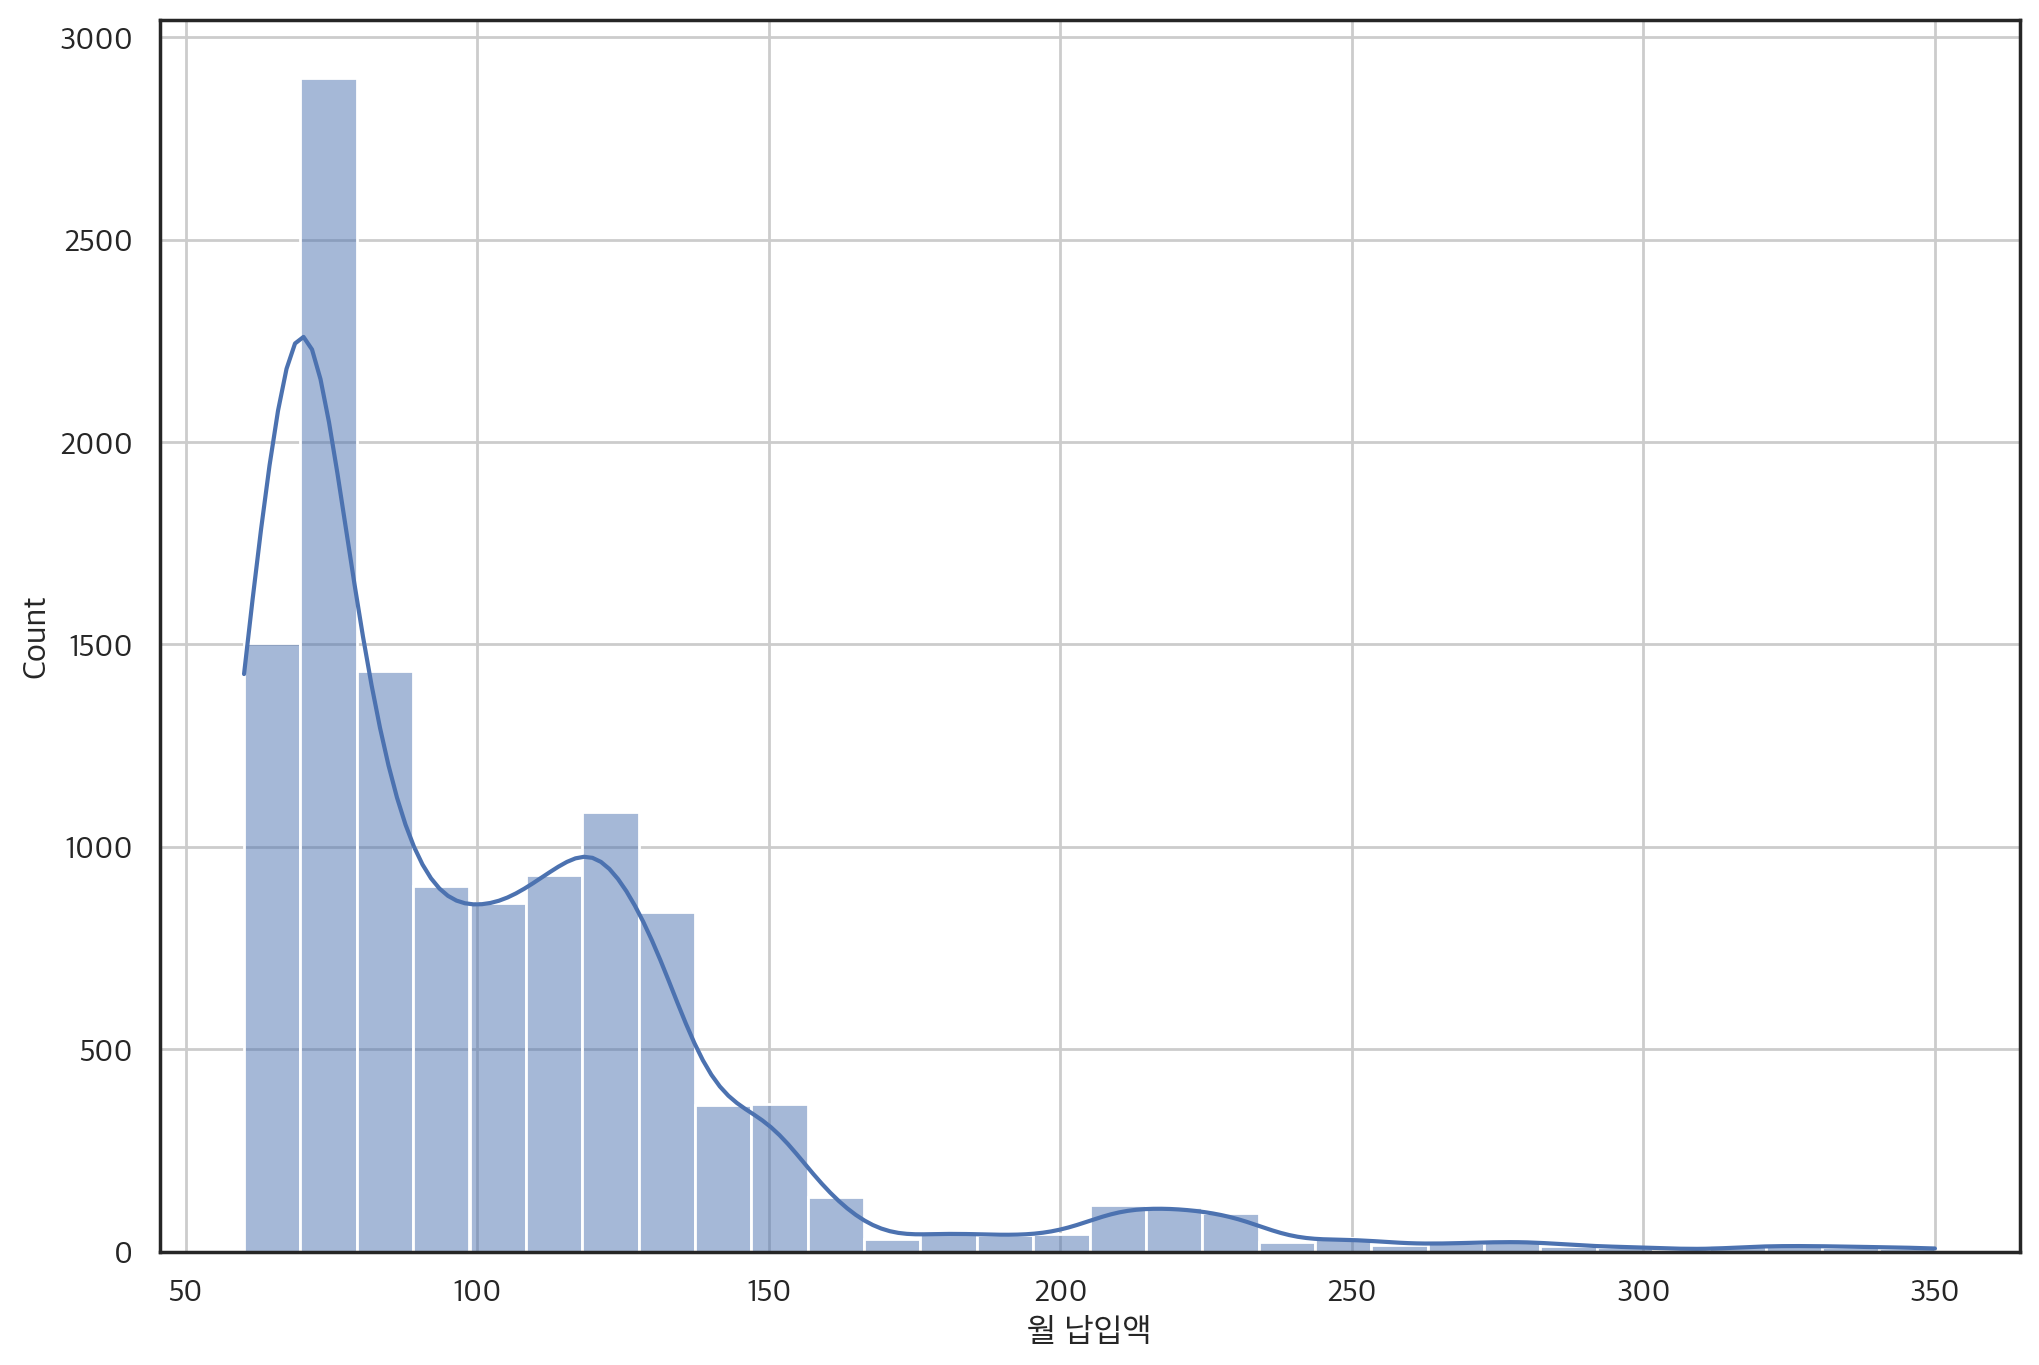

In [73]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['월 납입액'],bins=30,kde=True)
plt.grid()
plt.show()

In [92]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
feature = '월 납입액'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
월 납입액,12000.0,100.065833,42.45375,60.0,70.0,90.0,120.0,350.0


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 월에 7~8만원 정도 납입하는 사람들이 가장 많음
# 그 다음으로는 6만원, 9만원 정도를 납부하는 사람들이 많을 듯

# 월 납입액과 상품 타입이 관련 있을 것 같기도?
  # 기본 상품 가격이 6 ~ 9만원 정도인 것 같음
  # 중급 상품이 10 ~ 13만원 정도인 듯?
  # 고급은 그 이상

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

In [78]:
#[문제 25] '타 상품 보유 현황' 변수에 대해 범주별 비율을 확인하자.
data['타 상품 보유 현황'].value_counts(normalize = True).sort_index()

타 상품 보유 현황
1      0.356917
2      0.251417
3      0.128750
4이상    0.262917
Name: proportion, dtype: float64

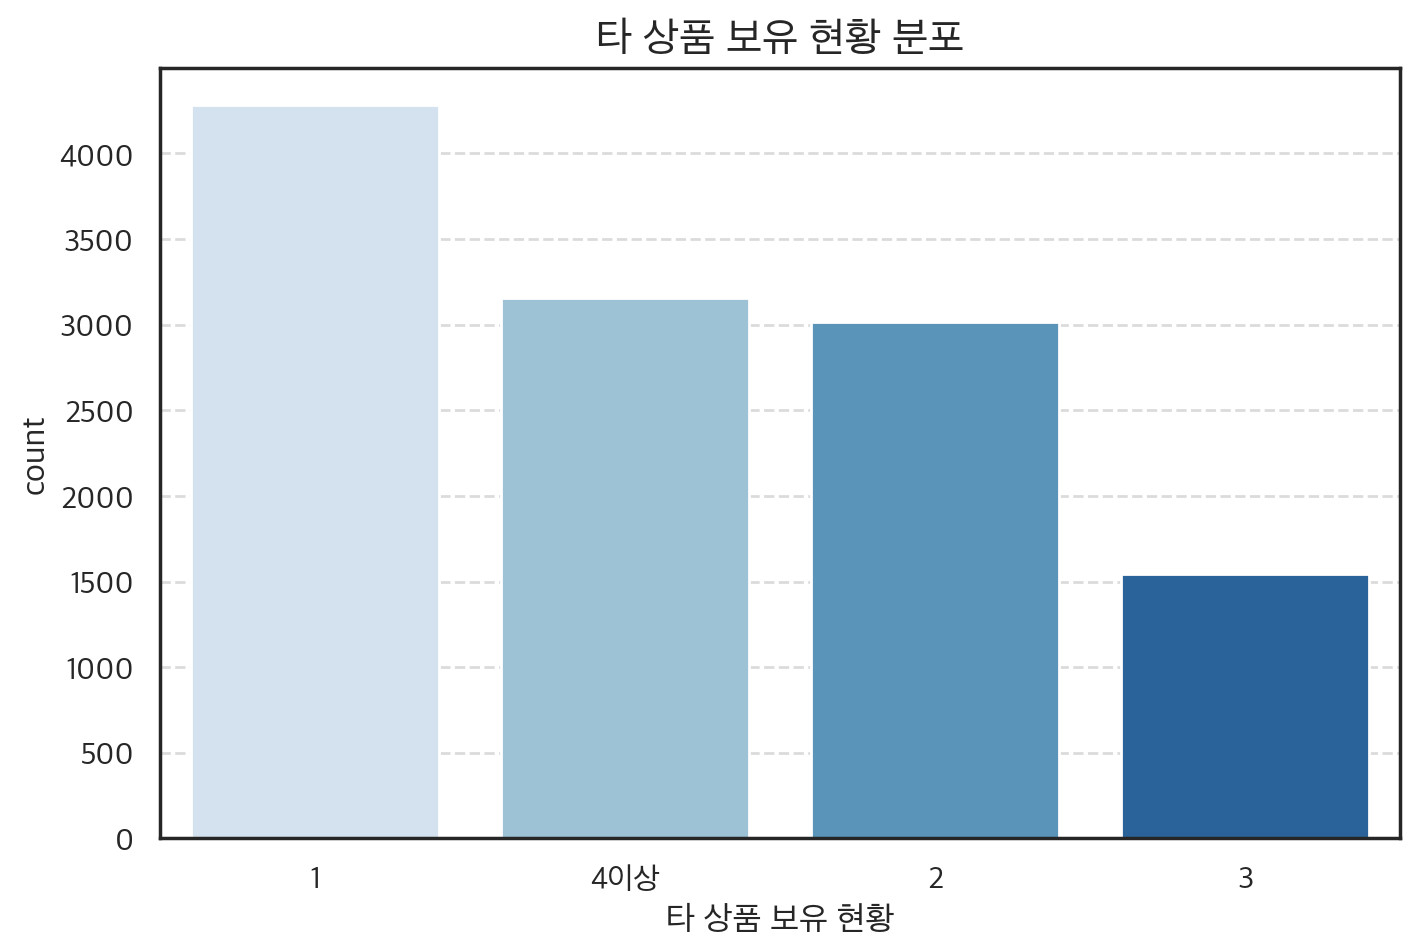

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x='타 상품 보유 현황', data=data, palette='Blues')
plt.title('타 상품 보유 현황 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 1개가 35%로 가장 높았고, 4개(26%), 2개(25%), 3개(12%) 순으로 나타남
# 건강 보험 상품을 포함해, 모든 고객이 P사의 제품을 최소 2개는 이용하고 있다는 뜻
  # 고객들이 가입하고 싶어서 가입한게 아니라, 건강 보험 상품을 가입할 때 같이 가입이 되도록 강제되어 있는건 아닐지?

# 타 상품 보유변수와 WTP를 같이 확인해보는게 좋을 듯
  # 여러 상품을 동시에 가입하도록 만드는 것이 락인효과를 불러일으키는 효과를 만들고 있는지 확인해봐야함
  # 효과가 있다면 P사의 여러 상품을 함께 가입하도록 유도하는 방안이 필요할 것
  # 효과가 없다면 오히려 강제로 가입하게 하는 방안이 역효과를 불러일으켰거나, 타 서비스의 혜택도 부족하다는 것을 의미할 수 있음

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

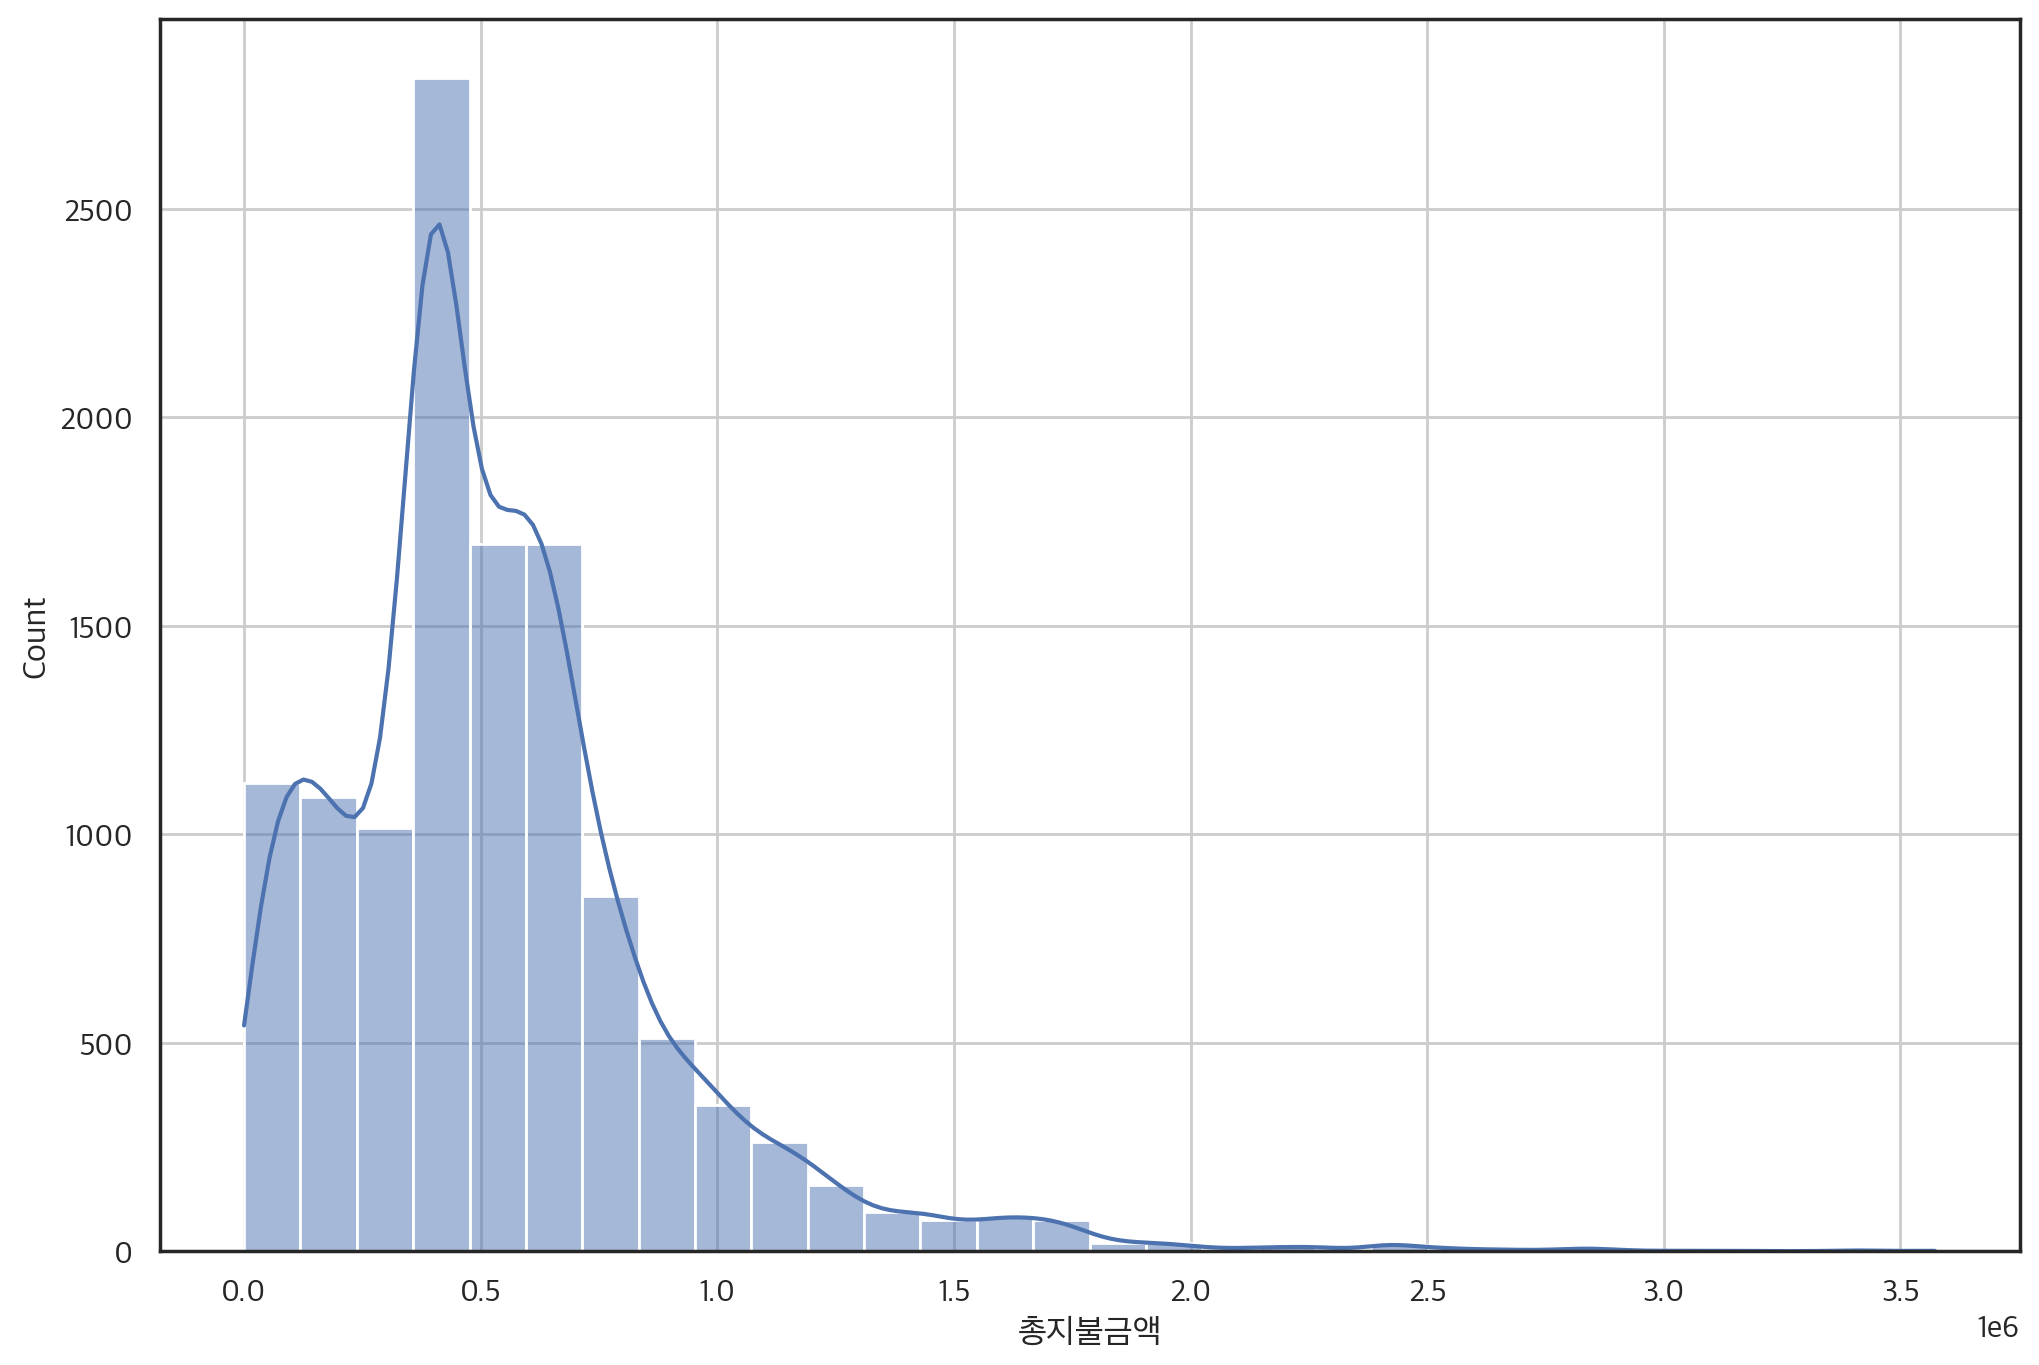

In [108]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['총지불금액'],bins=30,kde=True)
plt.grid()
plt.show()

In [100]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)
feature = ''
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
총지불금액,12000.0,535585.416667,358799.286205,0.0,336000.0,474000.0,679000.0,3573000.0


<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 총 지불 금액 : 의료비 청구 이후 심사 후 지급 금액
# 50만원 선에 가장 많은 고객이 있음 => 기본 상품에서 보장받을 수 있는 최대 금액인건가

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

### 1) 갱신여부
- 비갱신(0) : 보험 가입기간동안 보험료가 동일하게 유지됨
- 갱신(1) : 보험 가입기간동안 보험료가 주기적으로 재산정됨

In [84]:
# 범주별 비율 확인
data['갱신'].value_counts(normalize = True).sort_index()

갱신
0    0.857
1    0.143
Name: proportion, dtype: float64

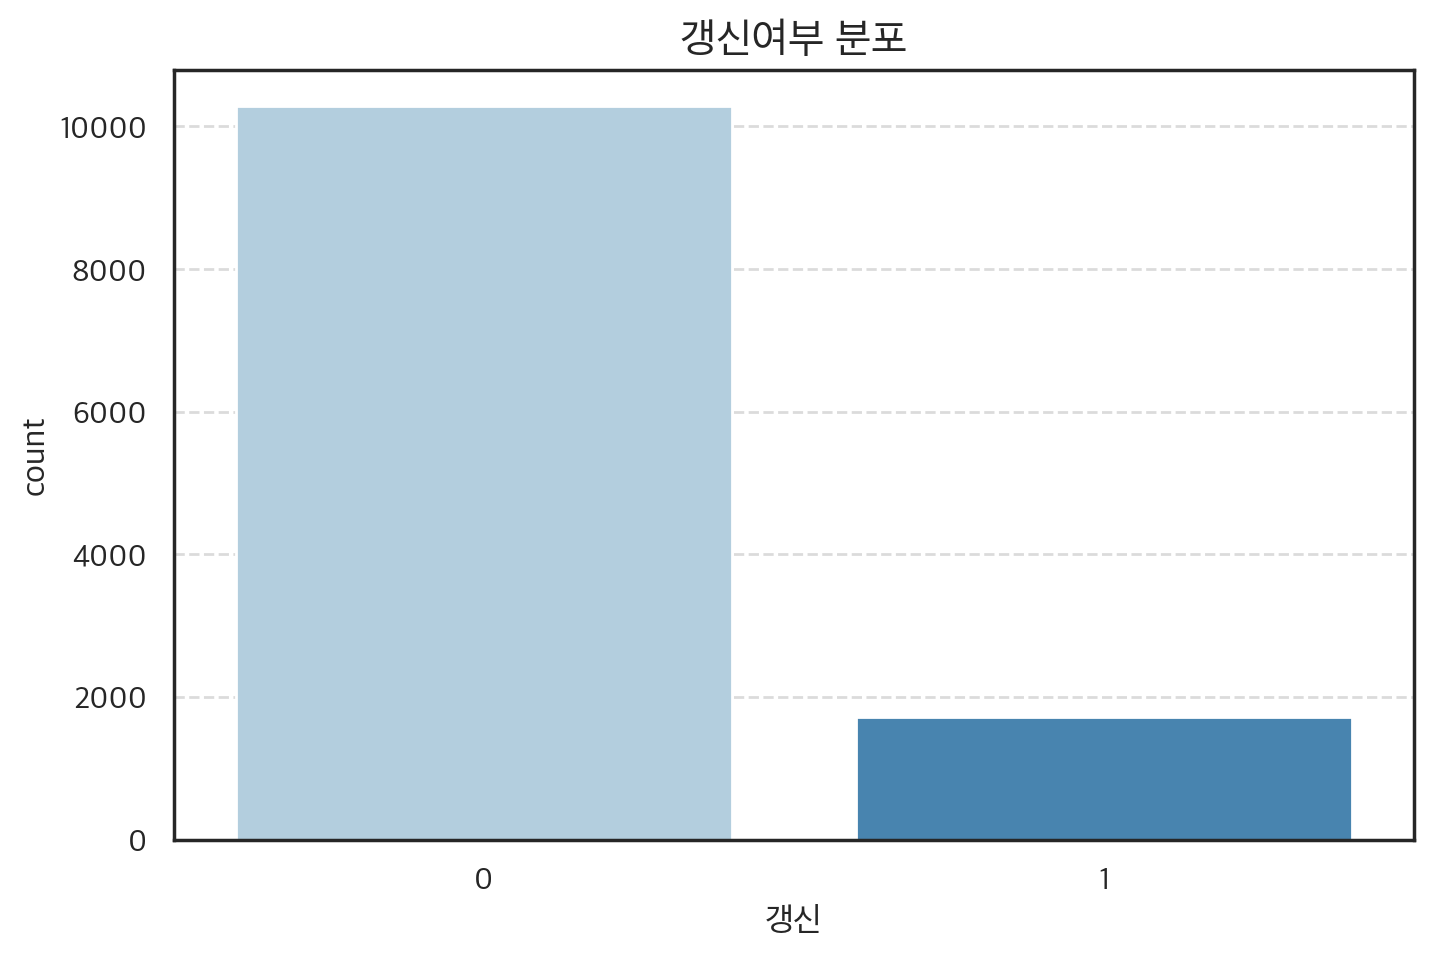

In [86]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='갱신', data=data, palette='Blues')
plt.title('갱신여부 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 보험 가입기간 동안 보험료가 일정하게 유지되는 비갱신 보험에 가입한 사람들이 많음(약 85%)

### 2) 지역
- 도시근교, 도심, 시골

In [87]:
# 범주별 비율 확인
data['지역'].value_counts(normalize = True).sort_index()

지역
도시근교    0.631000
도심      0.173667
시골      0.195333
Name: proportion, dtype: float64

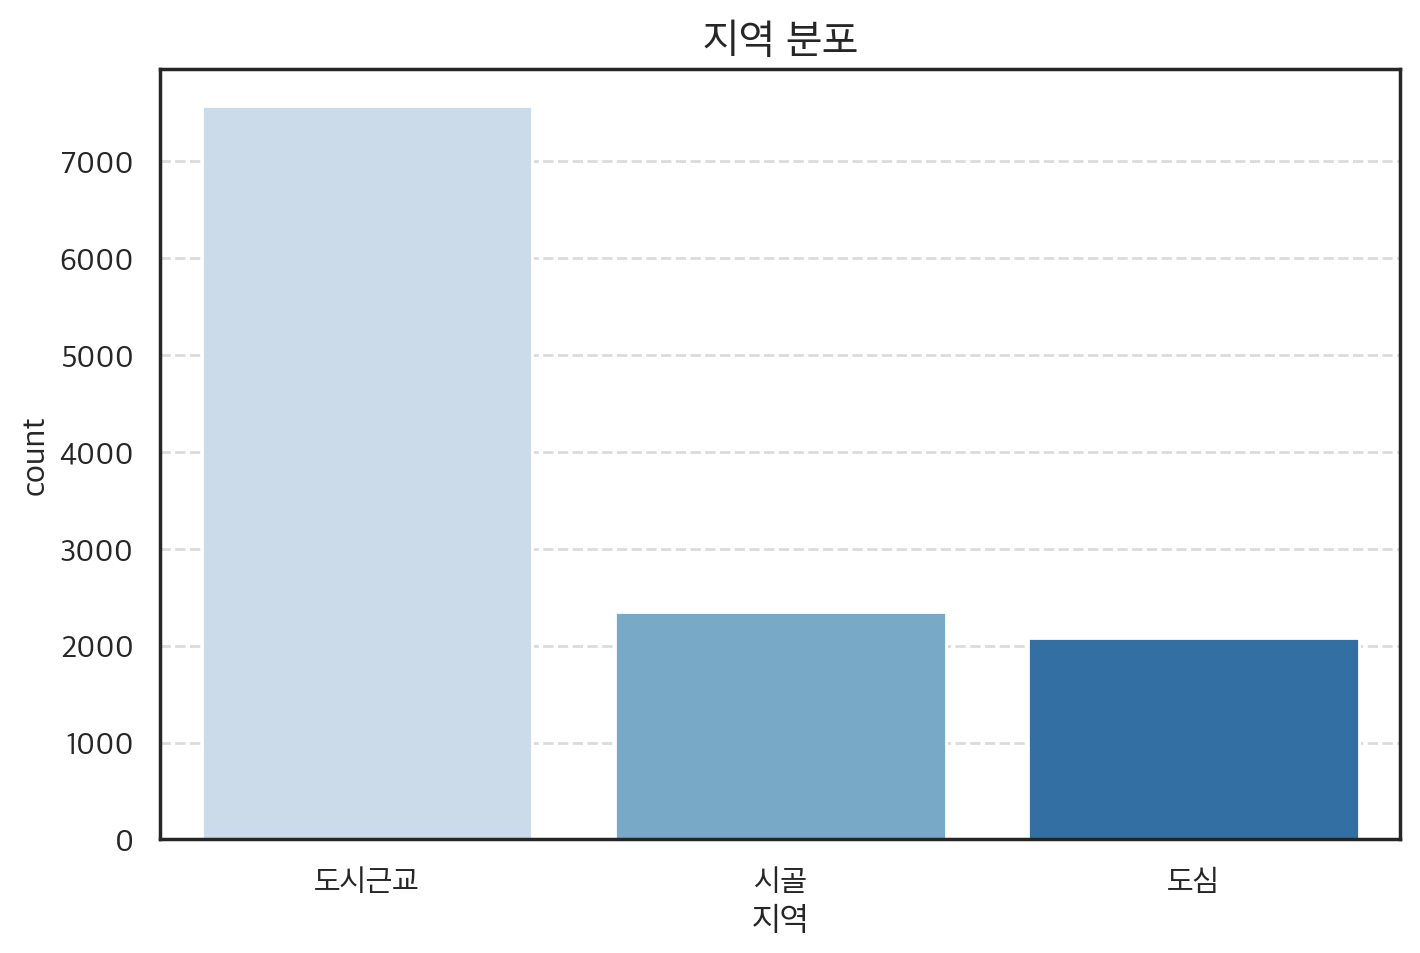

In [88]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='지역', data=data, palette='Blues')
plt.title('지역 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 도시 근교에 거주하는 사람들이 약 63%로 가장 많았고, 시골이 19%, 도심이 17% 순으로 나타남
# 도심에 사는 사람들이 집이나 자동차, 소득, 월납입액 등이 높을수도?

### 3) 결혼 여부
- 미혼, 기혼

In [89]:
# 범주별 비율 확인
data['결혼여부'].value_counts(normalize = True).sort_index()

결혼여부
기혼    0.57975
미혼    0.42025
Name: proportion, dtype: float64

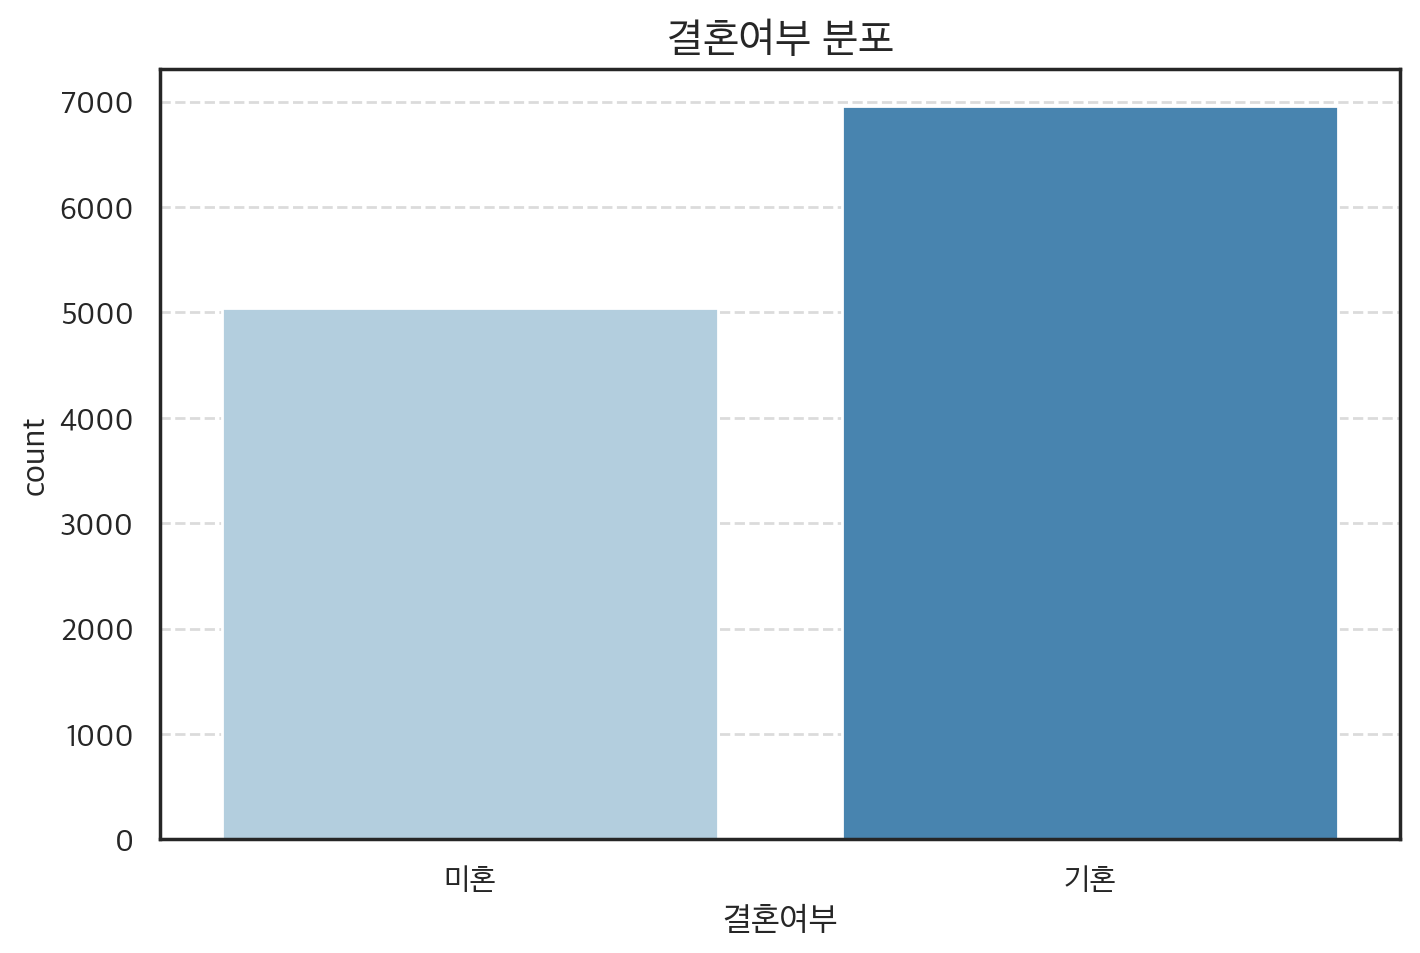

In [90]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='결혼여부', data=data, palette='Blues')
plt.title('결혼여부 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 기혼이 57%로 높게 나타났으나, 미혼도 42% 정도로 나타남 => 드라마틱한 차이는 없는 것 같음

### 4) VOC(불만접수 사례 수)

In [97]:
# 빈도수 확인
data['VOC'].value_counts(normalize = True).sort_index()

VOC
0    0.792917
1    0.109417
2    0.041250
3    0.033750
4    0.016333
5    0.006333
Name: proportion, dtype: float64

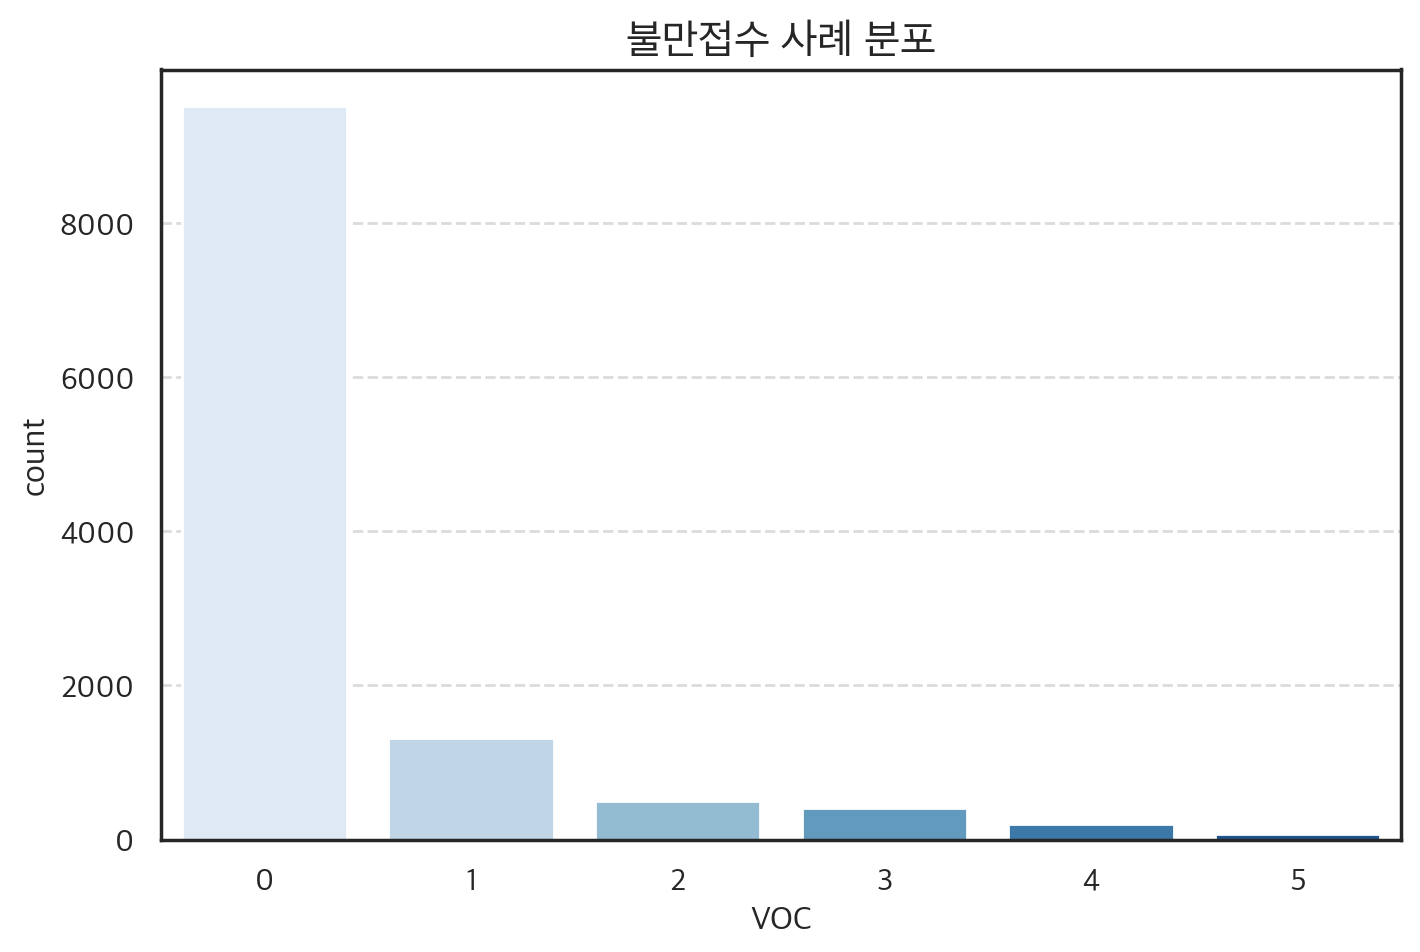

In [98]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='VOC', data=data, palette='Blues')
plt.title('불만접수 사례 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 0건이 79%로 가장 높았고, 1건(10%)이 그 다음으로 높았음

# 불만접수 사례랑 WTP를 같이 봐야할 듯

# 불만접수 사례는 적은데 WTP는 낮음 => 불만접수 안하고 그냥 이거 안쓰고 말지 하는 사람들이 많은 듯
  # 이렇게 되면 어디가 어떻게 부족하고 불만족스러운지 알기 어려움

### 5) 갱신인센티브
- 보험사가 갱신을 목적으로 한 마케팅 활동
- 없음, 설계사독려, 포인트, 할인

In [101]:
# 범주별 비율 확인
data['갱신인센티브'].value_counts(normalize = True).sort_index()

갱신인센티브
설계사독려    0.322083
없음       0.111500
포인트      0.157583
할인       0.408833
Name: proportion, dtype: float64

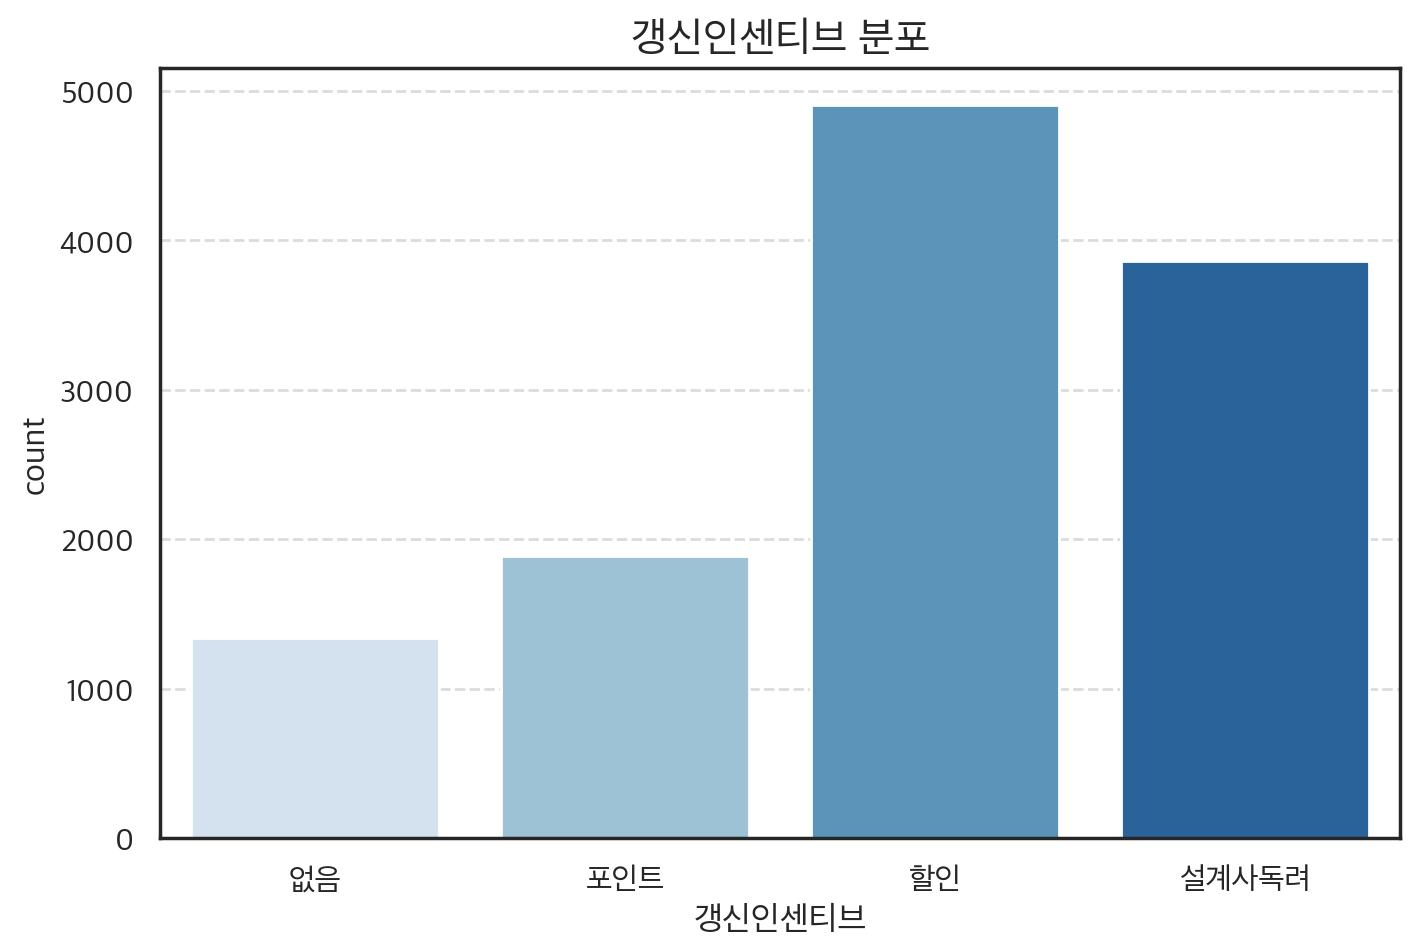

In [102]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='갱신인센티브', data=data, palette='Blues')
plt.title('갱신인센티브 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 할인이 40%로 가장 높았고, 설계사의 독려가 32%, 포인트가 15%, 없음이 11%로 나타남

# 역시 할인이 최고인 듯? => 그렇다고 무작정 가격 프로모션을 하면 남는게 없어짐 => 적정 수준을 찾아야함
# 생각보다 설계사의 독려가 갱신에 큰 영향을 미침 => 독려는 계속 활용하면 좋을 듯
# 포인트는 생각보다 낮게 나왔는데, 여기에는 (1) 포인트 지급 방식의 문제, (2) 포인트 지급 금액의 문제가 있을 수 있을 듯
  # (1) 사용처가 한정적인 포인트를 지급할 경우, 안주느니만 못한 포인트일 수 있음
  # (2) 포인트를 지급하긴 하지만 그 금액이 할인보다 적을 경우에는 할인을 선택하는 사람들이 많을 것임

### 6) 판매채널
- 해당 상품 구매 채널
- 대리점, 인터넷, 자사영업, 콜센터

In [109]:
# 범주별 비율 확인
data['판매채널'].value_counts(normalize = True).sort_index()

판매채널
대리점     0.382667
인터넷     0.145000
자사영업    0.279083
콜센터     0.193250
Name: proportion, dtype: float64

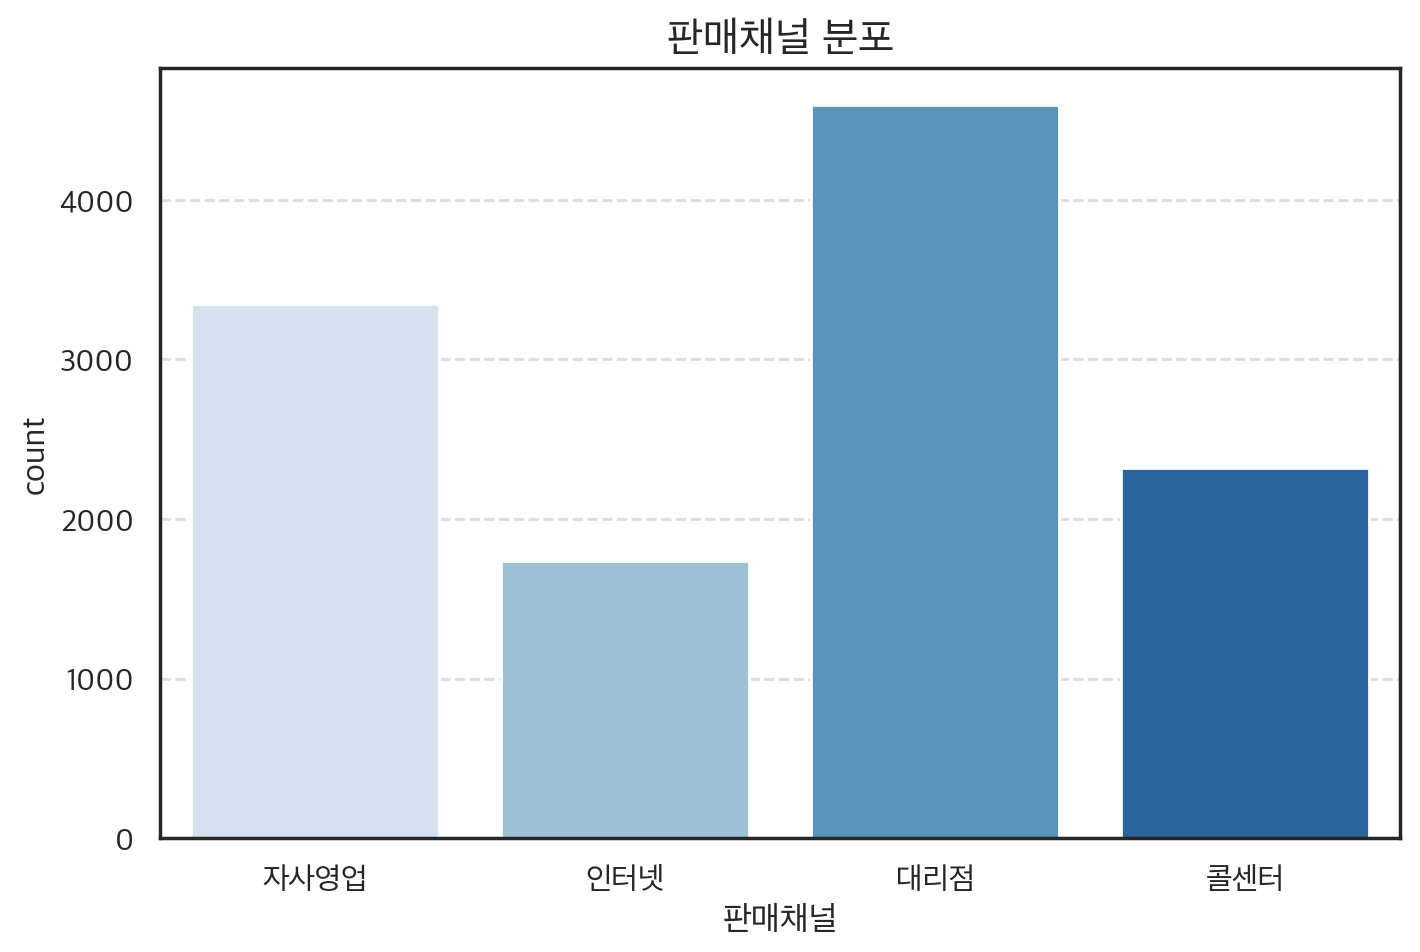

In [110]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='판매채널', data=data, palette='Blues')
plt.title('판매채널 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 대리점이 약 38%로 가장 높았고, 자사영업이 27%, 콜센터가 19%, 인터넷이 14%로 나타남
# 주요 가입 연령대가 4050세대인 만큼 인터넷보다는 대면(대리점, 자사영업) 방식의 가입이 많은 것으로 보임

# 4050대를 넘어 2030세대의 가입을 유도하기 위해서는 비대면(인터넷, 콜센터) 방식을 강화해야함
  # 특히 인터넷 강화가 필요 => 전화는 콜포비아 때문에 안좋아하는 사람도 많고, 인터넷이 더 쉽고 빠르니까 선호하는 사람들이 많음
  # 2030세대가 나이들어서 4050세대가 될거니까, 이들이 선호하는 방식으로 판매채널을 확대하는 것이 필요함

# <b>Mission 1 완료!
수고하셨습니다!